In [10]:
pip install numpy pandas matplotlib tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arjun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
pip install --upgrade tensorflow



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arjun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for preprocessing and data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # 20% of data for validation
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random width shifts
    height_shift_range=0.2,  # Random height shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill mode for new pixels
)

# Load training data
train_gen = datagen.flow_from_directory(
    'data/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use this subset for training
)

# Load validation data
val_gen = datagen.flow_from_directory(
    'data/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.7),  # Dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


C:\Users\arjun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Suitable for binary classification
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=100,
    validation_data=val_gen,
    validation_steps=val_gen.samples // val_gen.batch_size
)


Epoch 1/100


C:\Users\arjun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 97s 704ms/step - accuracy: 0.7133 - loss: 0.6032 - val_accuracy: 0.7646 - val_loss: 0.4778
Epoch 2/100
  1/130 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9062 - loss: 0.4564

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.4564 - val_accuracy: 0.9474 - val_loss: 0.3191
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 61s 459ms/step - accuracy: 0.8088 - loss: 0.3922 - val_accuracy: 0.7930 - val_loss: 0.4298
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7812 - loss: 0.3699 - val_accuracy: 0.8421 - val_loss: 0.1953
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 60s 451ms/step - accuracy: 0.8504 - loss: 0.3284 - val_accuracy: 0.8711 - val_loss: 0.2965
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9375 - loss: 0.2248 - val_accuracy: 0.9474 - val_loss: 0.2122
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 59s 445ms/step - accuracy: 0.8804 - loss: 0.2855 - val_accuracy: 0.8613 - val_loss: 0.2916
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8125 - loss: 0.2486 - val_accuracy: 0.9474 - val_loss: 0.2452
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.8836 - loss: 0.2626 - val_

In [16]:
test_gen = datagen.flow_from_directory(
    'data/chest_xray/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size)
print(f'Test Accuracy: {test_acc:.2f}')
# print(f'Test Loss: {test_loss:.2f}')


Found 624 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.8560 - loss: 0.7467
Test Accuracy: 0.85


In [17]:
model.save('pneumonia_detection_model.h5')


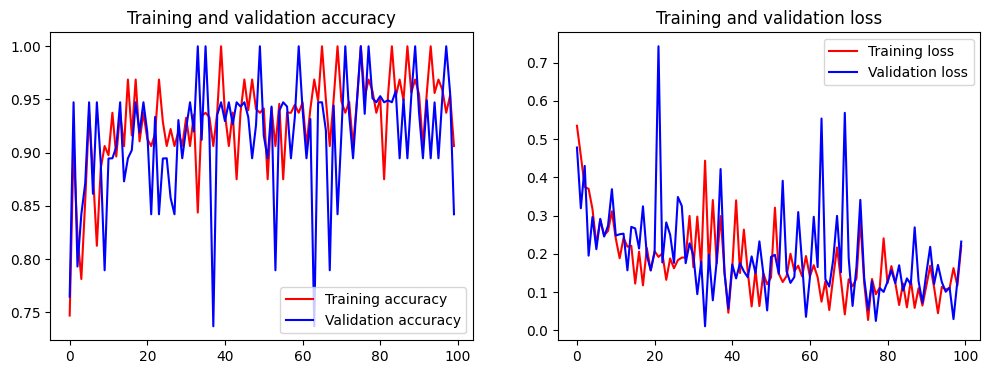

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
